In [1]:
#### pre-processing using REGULAR Expressions
import pandas as pd
import re
import matplotlib.pyplot as plt

tw=pd.read_csv('tweets.csv', encoding= 'ISO-8859-1')
#this might cause an error, as this file not coded with utf-8..one way to overcome
#this is to specify encoding='ISO-8859-1' 

In [4]:
tw.head() #prints top 5 rows by 


,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [7]:
tw.columns

Index(['text', 'favorited', 'favoriteCount', 'replyToSN', 'created',
       'truncated', 'replyToSID', 'id', 'replyToUID', 'statusSource',
       'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')

In [8]:
for index,tweet in enumerate(tw['text'][0:5]):#first 5 tweets (0,1,2,3,4)
    print(index+1, '.', tweet) #getting the feel of the data

1 . RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;
2 . RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?
3 . RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.

If not for Aam Aadmi, listen to th
4 . RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9
5 . RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F


In [9]:
text=tw['text'].copy() #making a copy of the tweets

In [10]:
#########################################################################
# Step 1 in some tweets "RT" is present..this should be removed
#########################################################################

def subRT(tweet):
    return re.sub('RT','',tweet)

subRT(text[1])#check with a sample
    
text=text.apply(subRT) #apply function applies this across each observastion
#by default axis=0 (rows)
text[1:5] #check whether text is cleaned

1     @Hemant_80: Did you vote on #Demonetization o...
2     @roshankar: Former FinSec, RBI Dy Governor, C...
3     @ANI_news: Gurugram (Haryana): Post office em...
4     @satishacharya: Reddy Wedding! @mail_today ca...
Name: text, dtype: object

In [11]:
########################################################################
# Step 2- in some tweets U+00A0 is present..this should be removed
########################################################################

def subU(tweet):
    return re.sub('<U\+[\w]+>','',tweet)

text=text.apply(subU)
text[1:4]

1     @Hemant_80: Did you vote on #Demonetization o...
2     @roshankar: Former FinSec, RBI Dy Governor, C...
3     @ANI_news: Gurugram (Haryana): Post office em...
Name: text, dtype: object

In [12]:
########################################################################
# Step 3- in some tweets <ed> is present..this should be removed
########################################################################

def subED(tweet):
    return re.sub('<ed>','',tweet)

text=text.apply(subED)
text[1:4]


1     @Hemant_80: Did you vote on #Demonetization o...
2     @roshankar: Former FinSec, RBI Dy Governor, C...
3     @ANI_news: Gurugram (Haryana): Post office em...
Name: text, dtype: object

In [13]:
########################################################################
# Step 5- in some tweets &amp is present..this should be replaced by &
########################################################################

def subAMP(tweet):
    return re.sub('&amp','&',tweet)

text=text.apply(subAMP)
text[1:4]


1     @Hemant_80: Did you vote on #Demonetization o...
2     @roshankar: Former FinSec, RBI Dy Governor, C...
3     @ANI_news: Gurugram (Haryana): Post office em...
Name: text, dtype: object

In [14]:
########################################################################
# Step 6- in some tweets URL is present..this should be removed
########################################################################
te="""@Joydas: Question in Narendra Modi App where PM is taking feedback 
if people support his #DeMonetization strategy http//t.co/pYgK8Rmg7r"""

def subURL(tweet):
    return re.sub('http[s]?.+','',tweet)#or 'http[s]?[A-Za-z0-9/.]+'

text=text.apply(subURL)
text[1:4]

1     @Hemant_80: Did you vote on #Demonetization o...
2     @roshankar: Former FinSec, RBI Dy Governor, C...
3     @ANI_news: Gurugram (Haryana): Post office em...
Name: text, dtype: object

In [16]:
########################################################################
# Step 7- get top 100 mentions #data analysis
########################################################################

def getMentions(tweet):
    grp=re.search('@\w+',tweet)
    if grp:
       return grp.group(0)
    else:
       return 'None'
   #writing else statement is necessary because few observastions does not
   #have mentions
   
mentions=text.apply(getMentions)
#top 100 mentions..as men is sorted by default in descending order
men=mentions.value_counts()[0:100]
men

None                2371
@URautelaForever    1273
@gauravcsawant       541
@ModiBharosa         540
@DrKumarVishwas      354
@5Forty3             286
@rssurjewala         284
@rahulroushan        281
@centerofright       237
@ShashiTharoor       220
@narendramodi        180
@steve_hanke         178
@ashu3page           170
@kanimozhi           153
@AskAnshul           149
@RoflGandhi_         148
@Timcast             139
@Atheist_Krishna     135
@Joydas              114
@ippatel             110
@jamewils            108
@attomeybharti       102
@Joydeep_911         102
@PIB_India            97
@PiyushGoyalOffc      95
@dna                  83
@DrGPradhan           83
@priyaakulkarni2      80
@MIB_India            79
@YouTube              77
                    ... 
@hi_paresh            30
@MinhazMerchant       28
@jackerhack           28
@Punitspeaks          28
@evanspiegel          27
@YesIamSaffron        27
@airnewsalerts        27
@rupasubramanya       27
@geetv79              26


In [17]:
#if you want only top 100 twitter handles without count
men.reset_index()['index']

0                 None
1     @URautelaForever
2       @gauravcsawant
3         @ModiBharosa
4      @DrKumarVishwas
5             @5Forty3
6         @rssurjewala
7        @rahulroushan
8       @centerofright
9       @ShashiTharoor
10       @narendramodi
11        @steve_hanke
12          @ashu3page
13          @kanimozhi
14          @AskAnshul
15        @RoflGandhi_
16            @Timcast
17    @Atheist_Krishna
18             @Joydas
19            @ippatel
20           @jamewils
21      @attomeybharti
22        @Joydeep_911
23          @PIB_India
24    @PiyushGoyalOffc
25                @dna
26         @DrGPradhan
27    @priyaakulkarni2
28          @MIB_India
29            @YouTube
            ...       
70          @hi_paresh
71     @MinhazMerchant
72         @jackerhack
73        @Punitspeaks
74        @evanspiegel
75      @YesIamSaffron
76      @airnewsalerts
77     @rupasubramanya
78            @geetv79
79         @IndiaToday
80     @CMOMaharashtra
81     @arvindsubraman
82      @Ur

In [18]:
########################################################################
# challange 8- source of the tweets
########################################################################
#statusSource tells which device was used for tweeting..iphone, anroid etc
tw['statusSource'].value_counts()[1:5]

def platform_type(source):
    sou=re.search("""android|iphone|web|windows|mobile|google|facebook|
            ipad|tweetdeck|onlywire""", source, re.IGNORECASE)
    if sou:
        return sou.group(0)
    else:
        return None

plat=tw['statusSource'].apply(platform_type)
plat.value_counts()


android      7643
Web          2548
iphone       2093
mobile        546
tweetdeck     492
Windows       249
facebook      167
onlywire      136
google        120
Android        62
windows         3
web             1
Name: statusSource, dtype: int64

Text(0, 0.5, 'Number of Tweets')

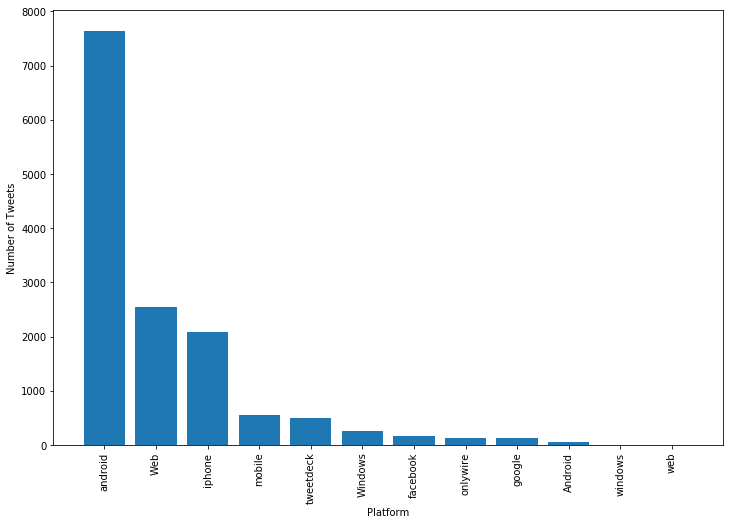

In [21]:
plt.figure(figsize=(12,8))
plt.bar(range(len(plat.value_counts().reset_index())),
        plat.value_counts().reset_index()['statusSource'])
plt.xticks(range(len(plat.value_counts().reset_index())),
           plat.value_counts().reset_index()['index'],rotation=90)
plt.xlabel('Platform')
plt.ylabel('Number of Tweets')

In [25]:
########################################################################
# challange 9- source of the tweets
########################################################################
def hashtag(tweet):
    tweet=tweet.lower()
    tweet=re.sub('demonetization','demonetization',tweet)
    if re.search('#\w+',tweet):
        return re.search('#\w+',tweet).group(0)
    else:
        return None

tvc=text.apply(hashtag).value_counts()
tvc.reset_index()

,index,text
0,#demonetization,7250
1,#nitishkumar,257
2,#india,241
3,#glvmi,145
4,#corruptionfreeindia,103
5,#vijaymallya,86
6,#demonetisation,67
7,#blackmoney,52
8,#sonunigam,49
9,#ratantata,44


Text(0, 0.5, 'Number of Tweets')

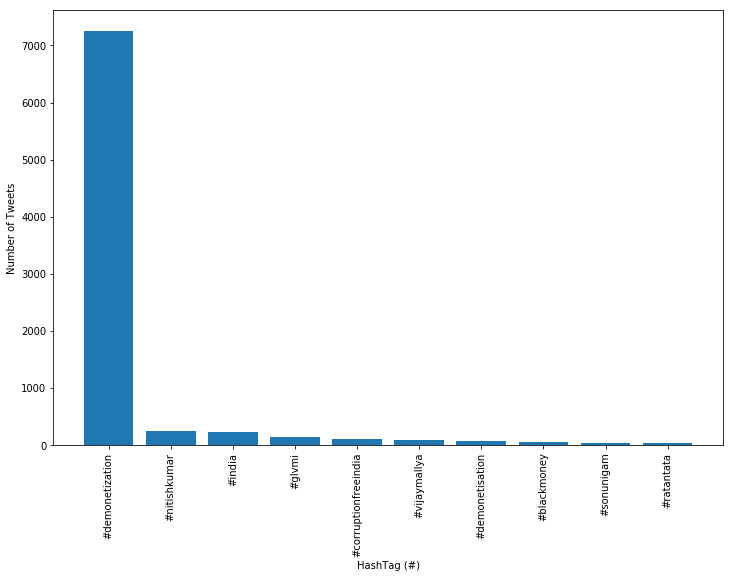

In [34]:
tvc=tvc[:10]
plt.figure(figsize=(12,8))
plt.bar(range(len(tvc)),tvc.reset_index()['text'])
plt.xticks(range(len(tvc)), tvc.reset_index()['index'],rotation=90)
plt.xlabel('HashTag (#)')
plt.ylabel('Number of Tweets')
